# Rain Next-Day Prediction Deployment using Logistic Regression & SVM
---  ------                       --------------   -----  
In this notebook, we would like to predict whether tomorrow it will rain or not using Logistic Regression & SVM

# Problem Statement
---  ------                       --------------   -----  
Rain prediction is one of the difficult and uncertain tasks that has a significant impact. Timely and accurate forecasting can proactively help daily life. The study presents a series of experiments involving the use of common machine learning techniques to create models that can predict whether or not it will rain tomorrow based on weather data for that day in major Australian cities.

We always like to know the parameters that meteorologists take into account before making a weather forecast, so we found this data set interesting. However, from an expert's point of view, this data set is pretty straightforward.

Therefore, in this kernel, we implement Logistic Regression and SVM with Scikit-Learn Python and create a classifier to predict whether it will rain tomorrow in Australia or not. We are using the Rain in Australia dataset for this project. This dataset contains about 10 years of daily weather observations from many locations across Australia.

# Data Source
Kaggle : Rain in Australia ( https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/ )

# Data Attributes
Total : 145460 observation × 23 variables

| No | Variables         |
| -- | :---------------- |
| 1  | Date              |
| 2  | Location          |
| 3  | MinTemp           |
| 4  | MaxTemp           |
| 5  | Rainfall          |
| 6  | Evaporation       |
| 7  | Sunshine          |
| 8  | WindGustDir       |
| 9  | WindGustSpeed     |
| 10 | WindDir9am        |
| 11 | WindDir3pm        |
| 12 | WindSpeed9am      |
| 13 | WindSpeed3pm      |
| 14 | Humidity9am       |
| 15 | Humidity3pm       |
| 16 | Pressure9am       |
| 17 | Pressure3pm       |
| 18 | Cloud9am          |
| 19 | Cloud3pm          |
| 20 | Temp9am           |
| 21 | Temp3pm           |
| 22 | RainToday         |
| 23 | RainTomorrow      |

# Objective:
---  ------                       --------------   -----  
    1. Get a good dataset with clear variables
    2. Get complete and easy-to-understand informationTo understand the dataset
    3. Get a clear partition of data for modeling
    4. Get a good logistic regression and support vector machine model
    5. To predict next-day rain by training classification models on the target variable RainTomorrow

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Loading Data

In [2]:
df = pd.read_csv('weatherAUS.csv')
pd.set_option('display.max_columns', None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Data Cleaning

Adding the 'month' and 'year' variables from the 'date' data in the dataset

In [5]:
df['Date']= pd.to_datetime(df['Date'])
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,2008


In [6]:
df_new = df.sort_values("Month")
df_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
58202,2009-01-30,Bendigo,22.0,43.2,0.0,12.0,NaN,S,39.0,ENE,SW,11.0,11.0,28.0,9.0,1013.3,1009.7,0.0,1.0,31.5,41.7,No,No,1,2009
13827,2014-01-24,Moree,17.2,30.2,20.8,9.0,1.2,NE,41.0,ENE,N,24.0,17.0,69.0,52.0,1013.3,1009.5,7.0,7.0,22.6,28.7,Yes,No,1,2014
13828,2014-01-25,Moree,20.4,34.2,0.4,4.4,11.3,SSW,44.0,S,SSW,33.0,33.0,55.0,20.0,1011.0,1008.7,6.0,3.0,22.4,32.2,No,No,1,2014
13829,2014-01-26,Moree,19.2,33.9,0.0,11.0,13.0,ENE,56.0,E,S,28.0,19.0,48.0,27.0,1017.8,1014.7,1.0,2.0,23.4,31.7,No,No,1,2014
13830,2014-01-27,Moree,16.5,33.4,0.0,12.8,13.2,ENE,54.0,E,SSE,19.0,17.0,48.0,23.0,1020.3,1016.5,0.0,1.0,22.3,31.3,No,No,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41614,2014-12-06,Williamtown,17.7,27.6,NaN,NaN,NaN,ENE,31.0,ESE,SE,4.0,24.0,79.0,62.0,1007.8,1004.2,NaN,3.0,22.5,26.1,NaN,Yes,12,2014
41615,2014-12-07,Williamtown,18.5,30.5,25.2,17.8,NaN,WNW,69.0,NNW,ESE,4.0,22.0,78.0,52.0,1006.6,1003.7,3.0,4.0,23.1,29.7,Yes,Yes,12,2014
41616,2014-12-08,Williamtown,19.3,30.7,4.2,6.8,7.5,NNW,63.0,NaN,N,0.0,37.0,80.0,97.0,1008.1,1008.6,4.0,6.0,23.6,19.7,Yes,Yes,12,2014
41610,2014-12-02,Williamtown,18.3,34.1,3.2,5.2,9.7,NE,44.0,NNW,E,13.0,20.0,83.0,42.0,1012.7,1009.4,6.0,3.0,22.6,31.7,Yes,No,12,2014


In [7]:
def get_season(month):
    if month in [1,2,12]: 
        return 'Summer'
    elif month in [3,4,5]: 
        return 'Fall'
    elif month in [6,7,8]: 
        return 'Winter'
    elif month in [9,10,11]: 
        return 'Spring' 
df_new['Season'] = df_new['Month'].apply(lambda x: get_season(x))

In [8]:
df_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Season
58202,2009-01-30,Bendigo,22.0,43.2,0.0,12.0,NaN,S,39.0,ENE,SW,11.0,11.0,28.0,9.0,1013.3,1009.7,0.0,1.0,31.5,41.7,No,No,1,2009,Summer
13827,2014-01-24,Moree,17.2,30.2,20.8,9.0,1.2,NE,41.0,ENE,N,24.0,17.0,69.0,52.0,1013.3,1009.5,7.0,7.0,22.6,28.7,Yes,No,1,2014,Summer
13828,2014-01-25,Moree,20.4,34.2,0.4,4.4,11.3,SSW,44.0,S,SSW,33.0,33.0,55.0,20.0,1011.0,1008.7,6.0,3.0,22.4,32.2,No,No,1,2014,Summer
13829,2014-01-26,Moree,19.2,33.9,0.0,11.0,13.0,ENE,56.0,E,S,28.0,19.0,48.0,27.0,1017.8,1014.7,1.0,2.0,23.4,31.7,No,No,1,2014,Summer
13830,2014-01-27,Moree,16.5,33.4,0.0,12.8,13.2,ENE,54.0,E,SSE,19.0,17.0,48.0,23.0,1020.3,1016.5,0.0,1.0,22.3,31.3,No,No,1,2014,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41614,2014-12-06,Williamtown,17.7,27.6,NaN,NaN,NaN,ENE,31.0,ESE,SE,4.0,24.0,79.0,62.0,1007.8,1004.2,NaN,3.0,22.5,26.1,NaN,Yes,12,2014,Summer
41615,2014-12-07,Williamtown,18.5,30.5,25.2,17.8,NaN,WNW,69.0,NNW,ESE,4.0,22.0,78.0,52.0,1006.6,1003.7,3.0,4.0,23.1,29.7,Yes,Yes,12,2014,Summer
41616,2014-12-08,Williamtown,19.3,30.7,4.2,6.8,7.5,NNW,63.0,NaN,N,0.0,37.0,80.0,97.0,1008.1,1008.6,4.0,6.0,23.6,19.7,Yes,Yes,12,2014,Summer
41610,2014-12-02,Williamtown,18.3,34.1,3.2,5.2,9.7,NE,44.0,NNW,E,13.0,20.0,83.0,42.0,1012.7,1009.4,6.0,3.0,22.6,31.7,Yes,No,12,2014,Summer


In [9]:
df_new.drop("Date", axis = 1, inplace = True)
df_new.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Season
58202,Bendigo,22.0,43.2,0.0,12.0,NaN,S,39.0,ENE,SW,11.0,11.0,28.0,9.0,1013.3,1009.7,0.0,1.0,31.5,41.7,No,No,1,2009,Summer
13827,Moree,17.2,30.2,20.8,9.0,1.2,NE,41.0,ENE,N,24.0,17.0,69.0,52.0,1013.3,1009.5,7.0,7.0,22.6,28.7,Yes,No,1,2014,Summer
13828,Moree,20.4,34.2,0.4,4.4,11.3,SSW,44.0,S,SSW,33.0,33.0,55.0,20.0,1011.0,1008.7,6.0,3.0,22.4,32.2,No,No,1,2014,Summer
13829,Moree,19.2,33.9,0.0,11.0,13.0,ENE,56.0,E,S,28.0,19.0,48.0,27.0,1017.8,1014.7,1.0,2.0,23.4,31.7,No,No,1,2014,Summer
13830,Moree,16.5,33.4,0.0,12.8,13.2,ENE,54.0,E,SSE,19.0,17.0,48.0,23.0,1020.3,1016.5,0.0,1.0,22.3,31.3,No,No,1,2014,Summer


##  Checking Null values

View data and modify null values

In [10]:
df_new.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Month                0
Year                 0
Season               0
dtype: int64

It can be seen that there are many missing values, so a comparison of the missing values ​​is made to the amount of data.

In [11]:
miss_val = df_new.isnull().sum()/len(df)*100
miss_val

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
Month             0.000000
Year              0.000000
Season            0.000000
dtype: float64

Values ​​that have more than 10 will be dropped because there are too many missing values ​​and should not have a strong correlation with the predicted goal

In [12]:
#There are 6 variables that will be dropped, because it is estimated that they do not have a close relationship with the goal

df_new = df_new.drop(['Evaporation', 'Sunshine', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'], axis=1)
df_new.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Season
58202,Bendigo,22.0,43.2,0.0,S,39.0,ENE,SW,11.0,11.0,28.0,9.0,31.5,41.7,No,No,1,2009,Summer
13827,Moree,17.2,30.2,20.8,NE,41.0,ENE,N,24.0,17.0,69.0,52.0,22.6,28.7,Yes,No,1,2014,Summer
13828,Moree,20.4,34.2,0.4,SSW,44.0,S,SSW,33.0,33.0,55.0,20.0,22.4,32.2,No,No,1,2014,Summer
13829,Moree,19.2,33.9,0.0,ENE,56.0,E,S,28.0,19.0,48.0,27.0,23.4,31.7,No,No,1,2014,Summer
13830,Moree,16.5,33.4,0.0,ENE,54.0,E,SSE,19.0,17.0,48.0,23.0,22.3,31.3,No,No,1,2014,Summer


In [13]:
df_new.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Month                0
Year                 0
Season               0
dtype: int64

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 58202 to 0
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Temp9am        143693 non-null  float64
 13  Temp3pm        141851 non-null  float64
 14  RainToday      142199 non-null  object 
 15  RainTomorrow   142193 non-null  object 
 16  Month          145460 non-null  int64  
 17  Year           145460 non-null

## Filling the null values

Before replacing the missing value with the average, we must look at the outliers in each variable

In [15]:
num_coloumn = df_new.select_dtypes(float).columns.to_list()
num_coloumn

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp9am',
 'Temp3pm']

In [16]:
cat = df_new.select_dtypes(float).columns.tolist()
for column in df_new[cat]:
    print(f'{column} : {df_new[column].unique()}')
    print()

MinTemp : [22.  17.2 20.4 19.2 16.5 17.1 17.  17.6 18.4 14.9 10.5  8.8  9.9 14.1
 12.  13.3 10.7  8.3  7.1 13.4 10.9 10.6  5.5  6.8 15.5 16.9 22.9 19.5
 24.6 18.6 17.3 19.8 17.7 15.1 13.6 13.7 21.6 24.8 28.3 26.6 14.8 15.8
 13.  19.  20.3 22.1 21.8 20.5 22.5 21.1 22.3 27.4 15.6 18.1 14.2  9.
 10.4  9.5  9.6  3.4 11.  17.4 25.5 14.3  6.1  2.2  5.4  8.2  4.9 10.3
 14.4 16.6 17.8 14.5 11.6 12.9 18.3  7.5 11.5  9.3 12.4 16.2  9.2 12.2
 12.5 16.1  nan 16.7 24.   9.8  9.1 11.4 11.1 24.5 17.5 19.7 15.  27.
 21.3 21.9 21.5 24.3 27.8 24.9 25.2 21.2 21.7 23.6 24.2 25.  22.2 23.7
 18.5 15.7 22.8 24.1 23.1 23.4 25.4 24.7 26.5 20.6 13.2 12.8 16.3 18.
 16.  15.2 19.6 18.2 15.3 22.4 23.9 24.4 17.9 14.7 10.  12.6 13.9 12.1
 26.2 26.  25.3 25.1 25.6 12.7 15.9 10.1 18.7 16.4 26.9  3.  20.  19.9
 18.8 11.9 14.6 20.9 27.1 20.7 20.1 20.8 20.2 19.1 19.4 25.9 23.8 22.7
 27.5 27.3 26.4 21.  21.4 10.2 23.  25.8 19.3 23.3 23.2  5.1 23.5 25.7
 18.9 12.3  9.7  3.3  2.1  4.8 10.8 13.8  7.8  5.7  6.2  4.   7.3  7.6

C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

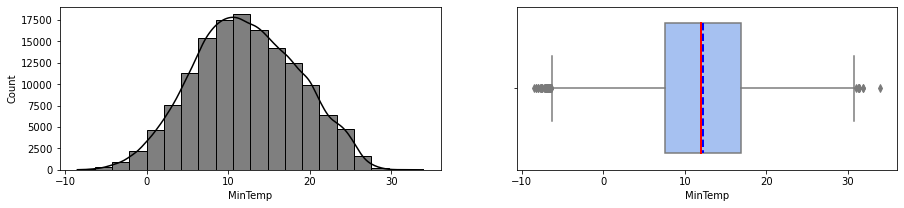

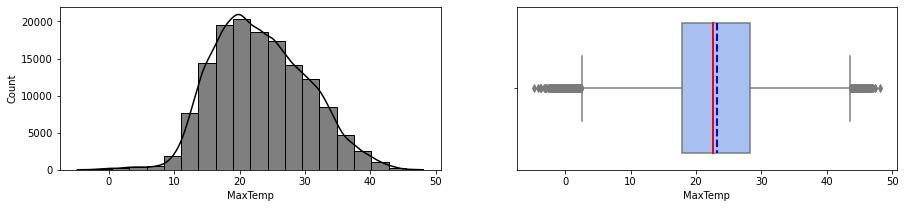

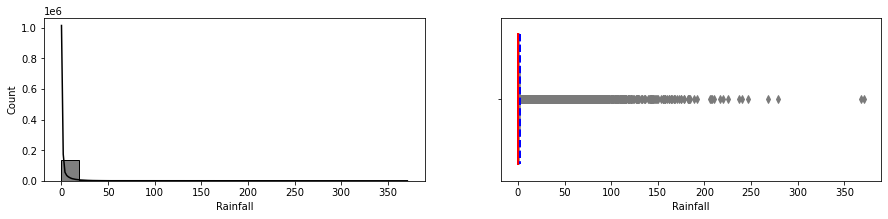

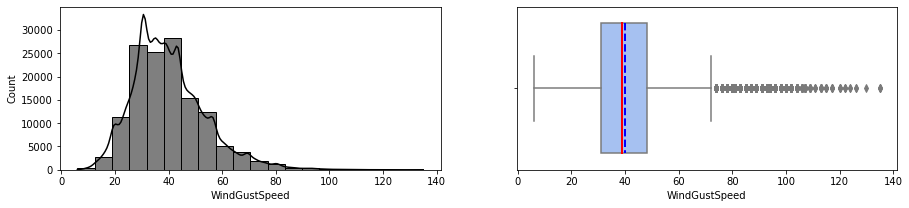

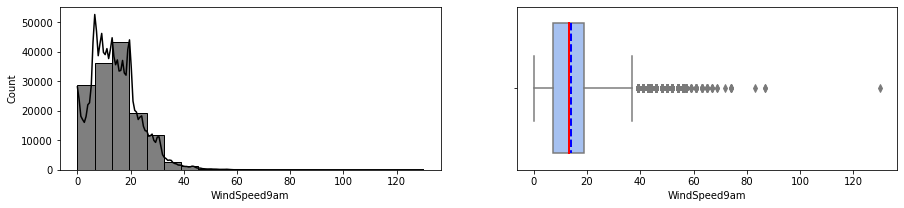

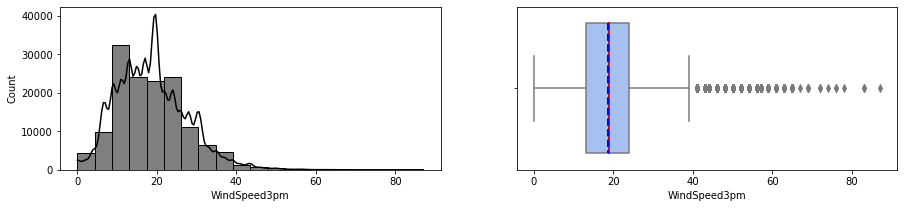

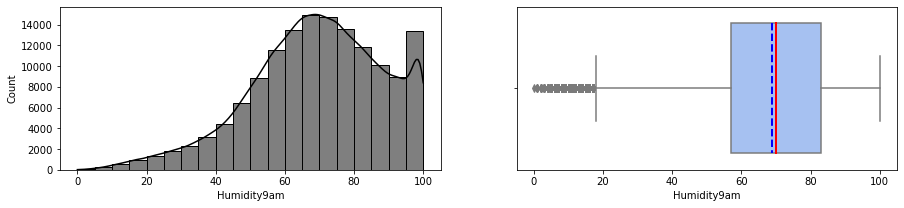

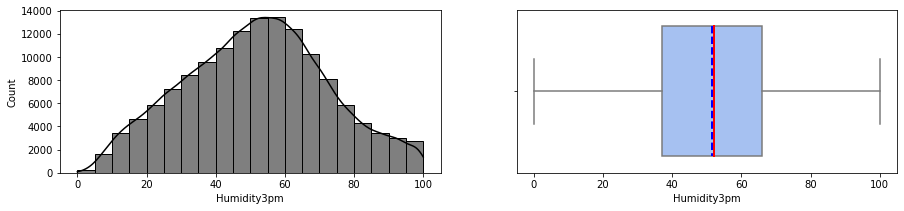

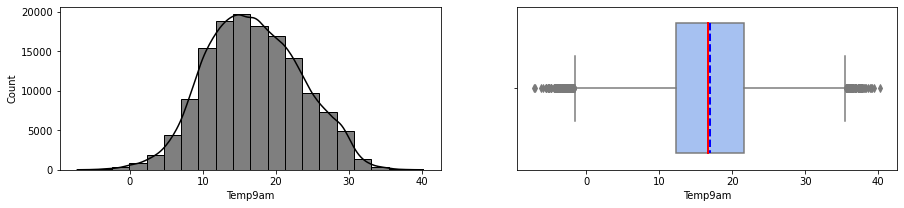

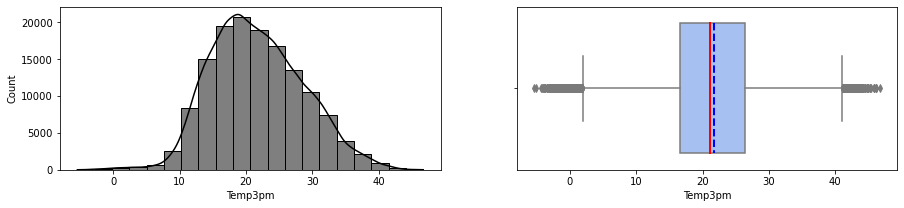

In [17]:
for i in num_coloumn:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(df[i],bins=20, kde=True,ax=axs[0], color = 'black');
    sns.boxplot(df[i], ax = axs[1], color='#99befd',
          showmeans = True,
          meanline = True,
          medianprops = {'linewidth':2, 'color':'red'},
          meanprops = {'linewidth':2, 'color':'blue'})

Based on the graph shown above, the variables 'rainfall' , 'windgustspeed', 'windspeed9am' and 'windspeed3pm' have many outliers.
so that the average value used to fill in the 'null' value is 3 IQR.

In [18]:
df_copy = df_new.copy()
df_copy

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Season
58202,Bendigo,22.0,43.2,0.0,S,39.0,ENE,SW,11.0,11.0,28.0,9.0,31.5,41.7,No,No,1,2009,Summer
13827,Moree,17.2,30.2,20.8,NE,41.0,ENE,N,24.0,17.0,69.0,52.0,22.6,28.7,Yes,No,1,2014,Summer
13828,Moree,20.4,34.2,0.4,SSW,44.0,S,SSW,33.0,33.0,55.0,20.0,22.4,32.2,No,No,1,2014,Summer
13829,Moree,19.2,33.9,0.0,ENE,56.0,E,S,28.0,19.0,48.0,27.0,23.4,31.7,No,No,1,2014,Summer
13830,Moree,16.5,33.4,0.0,ENE,54.0,E,SSE,19.0,17.0,48.0,23.0,22.3,31.3,No,No,1,2014,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41614,Williamtown,17.7,27.6,NaN,ENE,31.0,ESE,SE,4.0,24.0,79.0,62.0,22.5,26.1,NaN,Yes,12,2014,Summer
41615,Williamtown,18.5,30.5,25.2,WNW,69.0,NNW,ESE,4.0,22.0,78.0,52.0,23.1,29.7,Yes,Yes,12,2014,Summer
41616,Williamtown,19.3,30.7,4.2,NNW,63.0,NaN,N,0.0,37.0,80.0,97.0,23.6,19.7,Yes,Yes,12,2014,Summer
41610,Williamtown,18.3,34.1,3.2,NE,44.0,NNW,E,13.0,20.0,83.0,42.0,22.6,31.7,Yes,No,12,2014,Summer


In [19]:
Q1_R = df_copy['Rainfall'].quantile(0.25)
Q3_R = df_copy['Rainfall'].quantile(0.75)
IQR_R = Q3_R - Q1_R
df_copy= df_copy[~((df_copy['Rainfall']>(Q3_R+(3*IQR_R))))]

In [20]:
Q1_windg = df_copy['WindGustSpeed'].quantile(0.25)
Q3_windg = df_copy['WindGustSpeed'].quantile(0.75)
IQR_windg = Q3_windg - Q1_windg
df_copy= df_copy[~((df_copy['WindGustSpeed']>(Q3_windg+(3*IQR_windg))))]

In [21]:
Q1_w9 = df_copy['WindSpeed9am'].quantile(0.25)
Q3_w9 = df_copy['WindSpeed9am'].quantile(0.75)
IQR_w9 = Q3_w9- Q1_w9
df_copy= df_copy[~((df_copy['WindSpeed9am']>(Q3_w9+(3*IQR_w9))))]

In [22]:
Q1_w3 = df_copy['WindSpeed3pm'].quantile(0.25)
Q3_w3= df_copy['WindSpeed3pm'].quantile(0.75)
IQR_w3 = Q3_w3 - Q1_w3
df_new= df_copy[~((df_copy['WindSpeed3pm']>(Q3_w9+(3*IQR_w3))))]

In [23]:
df_copy

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Season
58202,Bendigo,22.0,43.2,0.0,S,39.0,ENE,SW,11.0,11.0,28.0,9.0,31.5,41.7,No,No,1,2009,Summer
13828,Moree,20.4,34.2,0.4,SSW,44.0,S,SSW,33.0,33.0,55.0,20.0,22.4,32.2,No,No,1,2014,Summer
13829,Moree,19.2,33.9,0.0,ENE,56.0,E,S,28.0,19.0,48.0,27.0,23.4,31.7,No,No,1,2014,Summer
13830,Moree,16.5,33.4,0.0,ENE,54.0,E,SSE,19.0,17.0,48.0,23.0,22.3,31.3,No,No,1,2014,Summer
13831,Moree,16.5,33.6,0.0,NE,43.0,ENE,E,19.0,15.0,46.0,24.0,23.3,31.5,No,No,1,2014,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41611,Williamtown,20.7,35.6,0.0,S,67.0,N,ENE,13.0,28.0,57.0,34.0,28.0,33.5,No,Yes,12,2014,Summer
41613,Williamtown,18.5,31.3,NaN,WNW,52.0,NE,E,11.0,24.0,74.0,56.0,23.3,28.9,NaN,NaN,12,2014,Summer
41614,Williamtown,17.7,27.6,NaN,ENE,31.0,ESE,SE,4.0,24.0,79.0,62.0,22.5,26.1,NaN,Yes,12,2014,Summer
41610,Williamtown,18.3,34.1,3.2,NE,44.0,NNW,E,13.0,20.0,83.0,42.0,22.6,31.7,Yes,No,12,2014,Summer


In [24]:
df_copy.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,Month,Year
count,123049.000000,123271.000000,121203.000000,115902.000000,122859.000000,121846.000000,122123.000000,120607.000000,122852.000000,121357.000000,124451.000000,124451.000000
mean,12.001253,23.700366,0.254396,39.076427,13.646432,18.372150,66.609377,48.808262,17.131777,22.167688,6.397972,2012.784341
std,6.449147,7.100211,0.624935,12.872147,8.636440,8.591678,18.874024,20.043185,6.543435,6.905908,3.440691,2.535224
min,-8.500000,-4.100000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,-5.600000,-4.400000,1.000000,2007.000000
25%,7.400000,18.400000,0.000000,30.000000,7.000000,13.000000,55.000000,34.000000,12.400000,17.100000,3.000000,2011.000000
50%,11.800000,23.200000,0.000000,37.000000,13.000000,17.000000,67.000000,49.000000,16.900000,21.600000,6.000000,2013.000000
75%,16.700000,28.700000,0.000000,46.000000,19.000000,24.000000,80.000000,63.000000,21.800000,26.900000,9.000000,2015.000000
max,33.900000,48.100000,3.200000,94.000000,54.000000,83.000000,100.000000,100.000000,40.200000,46.700000,12.000000,2017.000000


Data in 'df_copy' will be used to fill in null data in data 'df_new'

In [25]:
cat = df_new.select_dtypes(include=['object','category']).columns.tolist()
for column in df_new[cat]:
    print(f'{column} : {df_new[column].unique()}')
    print()

Location : ['Bendigo' 'Moree' 'Wollongong' 'Ballarat' 'PearceRAAF' 'Mildura'
 'MountGinini' 'AliceSprings' 'Albany' 'Townsville' 'Melbourne' 'Canberra'
 'Sale' 'SydneyAirport' 'Brisbane' 'SalmonGums' 'MountGambier'
 'Witchcliffe' 'Nuriootpa' 'Watsonia' 'Woomera' 'Williamtown' 'Walpole'
 'Newcastle' 'Hobart' 'Sydney' 'PerthAirport' 'Launceston' 'Richmond'
 'Perth' 'Penrith' 'Dartmoor' 'Darwin' 'CoffsHarbour' 'Cairns' 'Portland'
 'Cobar' 'Tuggeranong' 'MelbourneAirport' 'NorfolkIsland' 'Nhil'
 'Adelaide' 'NorahHead' 'WaggaWagga' 'Uluru' 'GoldCoast' 'Albury'
 'BadgerysCreek' 'Katherine']

WindGustDir : ['S' 'SSW' 'ENE' 'NE' 'ESE' 'N' 'SW' 'SSE' 'NNW' 'SE' 'WSW' 'NW' 'E' nan
 'WNW' 'NNE' 'W']

WindDir9am : ['ENE' 'S' 'E' 'ESE' 'WSW' 'NE' 'N' 'SE' 'SSE' 'W' 'SSW' 'NNE' 'SW' 'NNW'
 'WNW' 'NW' nan]

WindDir3pm : ['SW' 'SSW' 'S' 'SSE' 'E' 'NNE' 'ENE' 'WSW' 'NE' 'N' 'SE' 'NNW' 'W' 'WNW'
 'NW' 'ESE' nan]

RainToday : ['No' 'Yes' nan]

RainTomorrow : ['No' 'Yes' nan]

Season : ['Summer' 'Fall' 'W

To fill in the missing value in the object category, that is by putting the value that appears the most (mode)

In [26]:
#There are 5 data objects that are filled with data
df_new['WindGustDir'].fillna(df_new['WindGustDir'].mode()[0], inplace=True)
df_new['WindDir9am'].fillna(df_new['WindDir9am'].mode()[0], inplace=True)
df_new['WindDir3pm'].fillna(df_new['WindDir3pm'].mode()[0], inplace=True)
df_new['RainToday'].fillna(df_new['RainToday'].mode()[0], inplace=True)
df_new['RainTomorrow'].fillna(df_new['RainTomorrow'].mode()[0], inplace=True)

C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\4081546695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['WindGustDir'].fillna(df_new['WindGustDir'].mode()[0], inplace=True)
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\4081546695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['WindDir9am'].fillna(df_new['WindDir9am'].mode()[0], inplace=True)
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\4081546695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

Next, fill in the missing values ​​in the numeric data, by taking the average of each variable

In [27]:
#There are 6 data numeric that are filled with data
df_new['MinTemp']=df_new['MinTemp'].fillna(df_new['MinTemp'].mean())
df_new['MaxTemp']=df_new['MaxTemp'].fillna(df_new['MaxTemp'].mean())
df_new['Humidity9am']=df_new['Humidity9am'].fillna(df_new['Humidity9am'].mean())
df_new['Humidity3pm']=df_new['Humidity3pm'].fillna(df_new['Humidity3pm'].mean())
df_new['Temp9am']=df_new['Temp9am'].fillna(df_new['Temp9am'].mean())
df_new['Temp3pm']=df_new['Temp3pm'].fillna(df_new['Temp3pm'].mean())

C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\4125395488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MinTemp']=df_new['MinTemp'].fillna(df_new['MinTemp'].mean())
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\4125395488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MaxTemp']=df_new['MaxTemp'].fillna(df_new['MaxTemp'].mean())
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\4125395488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Then fill in the column in the data 'df_new' using the data 'df_copy'

In [28]:
df_new['Rainfall']=df_new['Rainfall'].fillna(df_copy['Rainfall'].mean())
df_new['WindGustSpeed']=df_new['WindGustSpeed'].fillna(df_copy['WindGustSpeed'].mean())
df_new['WindSpeed9am']=df_new['WindSpeed9am'].fillna(df_copy['WindSpeed9am'].mean())
df_new['WindSpeed3pm']=df_new['WindSpeed3pm'].fillna(df_copy['WindSpeed3pm'].mean())

C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\1888510096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Rainfall']=df_new['Rainfall'].fillna(df_copy['Rainfall'].mean())
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\1888510096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['WindGustSpeed']=df_new['WindGustSpeed'].fillna(df_copy['WindGustSpeed'].mean())
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\1888510096.py:3: SettingWithCopyWarning: 
A value i

In [29]:
df_new.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Year             0
Season           0
dtype: int64

To see if the data at '9am' and '3pm' can be merged

In [30]:
range_humidity = (abs(df_new['Humidity9am']-df_new['Humidity3pm']))
range_WindSpeed = (abs(df_new['WindSpeed9am']-df_new['WindSpeed3pm']))
range_temp = (abs(df_new['Temp9am']-df_new['Temp3pm']))
print(range_humidity.describe())
print(range_WindSpeed.describe())
print(range_temp.describe())

count    124337.000000
mean         20.123721
std          13.518795
min           0.000000
25%           9.000000
50%          18.000000
75%          29.000000
max          91.000000
dtype: float64
count    124337.000000
mean          7.671975
std           6.083948
min           0.000000
25%           3.000000
50%           6.000000
75%          11.000000
max          50.000000
dtype: float64
count    124337.000000
mean          5.295170
std           3.357148
min           0.000000
25%           2.600000
50%           5.000000
75%           7.600000
max          26.268293
dtype: float64


Judging from the difference in the average percentage

In [31]:
# For Humidity
print(f"For Humidity(%) \t :", range_humidity.mean()/((df_new['Humidity9am'].mean()+df_new['Humidity3pm'].mean())/2)*100)
# For Temperatur
print(f"For Temperatur(%) \t:", range_temp.mean()/((df_new['Temp9am'].mean()+df_new['Temp3pm'].mean())/2)*100)
# For WindSpeed
print(f"For Wind Speed(%) \t :", range_WindSpeed.mean()/((df_new['WindSpeed9am'].mean()+df_new['WindSpeed3pm'].mean())/2)*100)

For Humidity(%) 	 : 34.86773136950159
For Temperatur(%) 	: 26.948131592921786
For Wind Speed(%) 	 : 47.99584329276483


For the difference in 'Wind Speed' close to 50% of the average, so the wind speed is not combined

In [32]:
df_new['Average Temp']= (df_new['Temp9am']+df_new['Temp3pm'])/2
df_new['Average Humidity']= (df_new['Humidity9am']+df_new['Humidity3pm'])/2
df_new.drop(['MinTemp','MaxTemp','Temp9am','Temp3pm','Humidity9am','Humidity3pm'],axis=1,inplace=True)

C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\3873590696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Average Temp']= (df_new['Temp9am']+df_new['Temp3pm'])/2
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\3873590696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Average Humidity']= (df_new['Humidity9am']+df_new['Humidity3pm'])/2
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\3873590696.py:3: SettingWithCopyWarning: 
A value is trying to be set on

Drops are made on the combined variables as well as for temperature, using the average temperature at 9am and 3pm so that the 'MinTemp' and 'MaxTem' variables are dropped

In [33]:
df_new

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow,Month,Year,Season,Average Temp,Average Humidity
58202,Bendigo,0.000000,S,39.0,ENE,SW,11.0,11.0,No,No,1,2009,Summer,36.60,18.5
13828,Moree,0.400000,SSW,44.0,S,SSW,33.0,33.0,No,No,1,2014,Summer,27.30,37.5
13829,Moree,0.000000,ENE,56.0,E,S,28.0,19.0,No,No,1,2014,Summer,27.55,37.5
13830,Moree,0.000000,ENE,54.0,E,SSE,19.0,17.0,No,No,1,2014,Summer,26.80,35.5
13831,Moree,0.000000,NE,43.0,ENE,E,19.0,15.0,No,No,1,2014,Summer,27.40,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41611,Williamtown,0.000000,S,67.0,N,ENE,13.0,28.0,No,Yes,12,2014,Summer,30.75,45.5
41613,Williamtown,0.254396,WNW,52.0,NE,E,11.0,24.0,No,No,12,2014,Summer,26.10,65.0
41614,Williamtown,0.254396,ENE,31.0,ESE,SE,4.0,24.0,No,Yes,12,2014,Summer,24.30,70.5
41610,Williamtown,3.200000,NE,44.0,NNW,E,13.0,20.0,Yes,No,12,2014,Summer,27.15,62.5


# EDA (Exploratory Data Analysis)

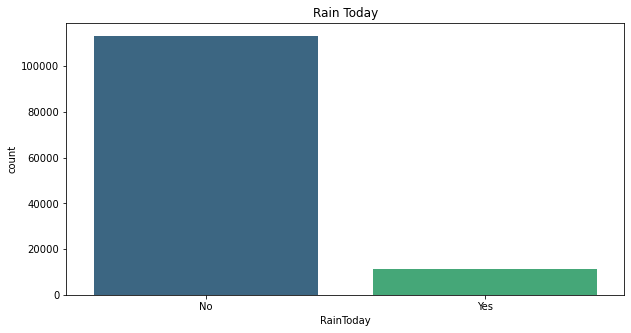

In [34]:
plt.figure(figsize=(10,5))

sns.countplot (x='RainToday', data=df_new, palette='viridis')
plt.title('Rain Today')

plt.show()

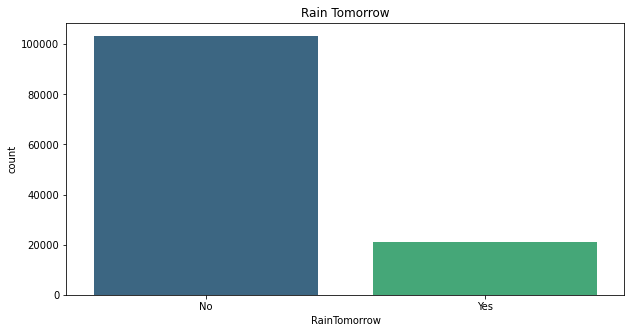

In [35]:
plt.figure(figsize=(10,5))

sns.countplot (x='RainTomorrow', data=df_new, palette='viridis')
plt.title('Rain Tomorrow')

plt.show()

C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


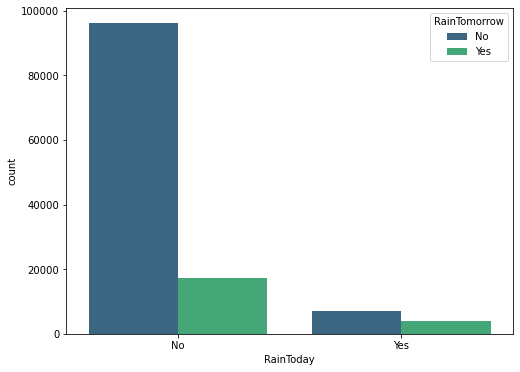

In [36]:
plt.figure(figsize=(8,6))

sns.countplot(df_new['RainToday'], 
              hue=df_new['RainTomorrow'], 
              palette='viridis');

In [37]:
x = pd.crosstab(df_new['RainTomorrow'],df_new['RainToday'])
x

RainToday,No,Yes
RainTomorrow,,
No,96124,7186
Yes,17139,3888


In [38]:
y = x/(x.sum().values)*100
y

RainToday,No,Yes
RainTomorrow,,
No,84.867962,64.890735
Yes,15.132038,35.109265


**Conclusion:**


- If it's not raining today then the chance of raining tomorrow = 15.21%
- while if it's raining today the chance of raining tomorrow = 35.11%

### RainTomorrow Every Month

<AxesSubplot:xlabel='Month', ylabel='count'>

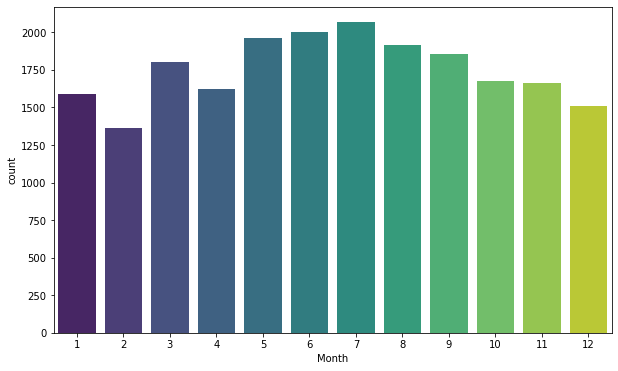

In [39]:
plt.figure(figsize = (10,6))
sns.countplot(data = df_new[df_new['RainTomorrow'] == 'Yes'],x = 'Month', palette = 'viridis')

**Conclusion:**

- It can be seen in the chart above that during **July** the occurrence of rain tomorrow is more frequent than other months with a number above 2000.
- And we can also see that in **February** the occurrence of rain tomorrow has the least amounts.

### RainTomorrow Based on Rainfall by Month and Year

<AxesSubplot:xlabel='Month', ylabel='Rainfall'>

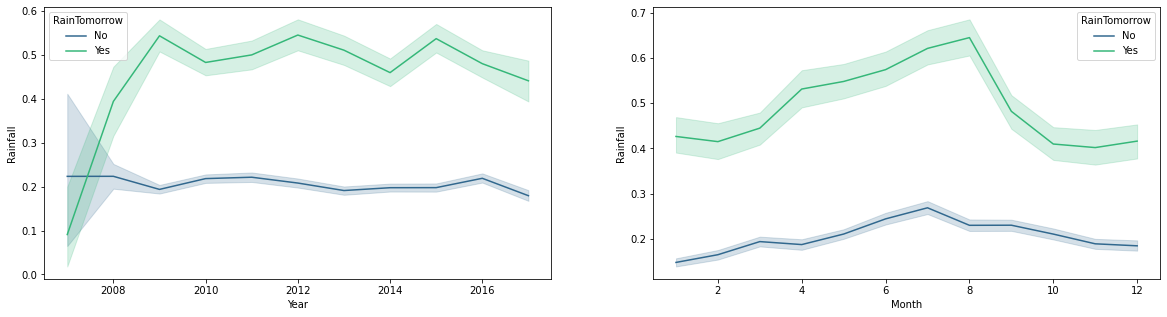

In [40]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.lineplot (x='Year', y='Rainfall', hue='RainTomorrow', data=df_new, palette = 'viridis')

plt.subplot(1,2,2)
sns.lineplot (x='Month', y='Rainfall', hue='RainTomorrow', data=df_new, palette = 'viridis')

### The Highest Average Rainfall

In [41]:
df_mean = df[['Location','Rainfall']].groupby('Location').mean().sort_values(by='Rainfall', ascending=False)
df_mean.T

Location,Cairns,Darwin,CoffsHarbour,GoldCoast,Wollongong,Williamtown,Townsville,NorahHead,Sydney,MountGinini,Katherine,Newcastle,Brisbane,NorfolkIsland,SydneyAirport,Walpole,Witchcliffe,Portland,Albany,BadgerysCreek,Penrith,Tuggeranong,Dartmoor,Richmond,MountGambier,Launceston,Albury,Perth,Melbourne,Watsonia,PerthAirport,Canberra,Ballarat,WaggaWagga,PearceRAAF,Moree,Bendigo,Hobart,Adelaide,Sale,MelbourneAirport,Nuriootpa,Cobar,SalmonGums,Mildura,Nhil,AliceSprings,Uluru,Woomera
Rainfall,5.742035,5.092452,5.061497,3.769396,3.594903,3.591108,3.485592,3.387299,3.324543,3.29226,3.20109,3.183892,3.144891,3.127665,3.009917,2.906846,2.895664,2.530374,2.263859,2.193101,2.175304,2.164043,2.146567,2.138462,2.087562,2.011988,1.914115,1.906295,1.870062,1.86082,1.761648,1.74172,1.740026,1.709946,1.66908,1.630203,1.61938,1.601819,1.566354,1.510167,1.451977,1.390343,1.127309,1.034382,0.945062,0.934863,0.88285,0.784363,0.490405


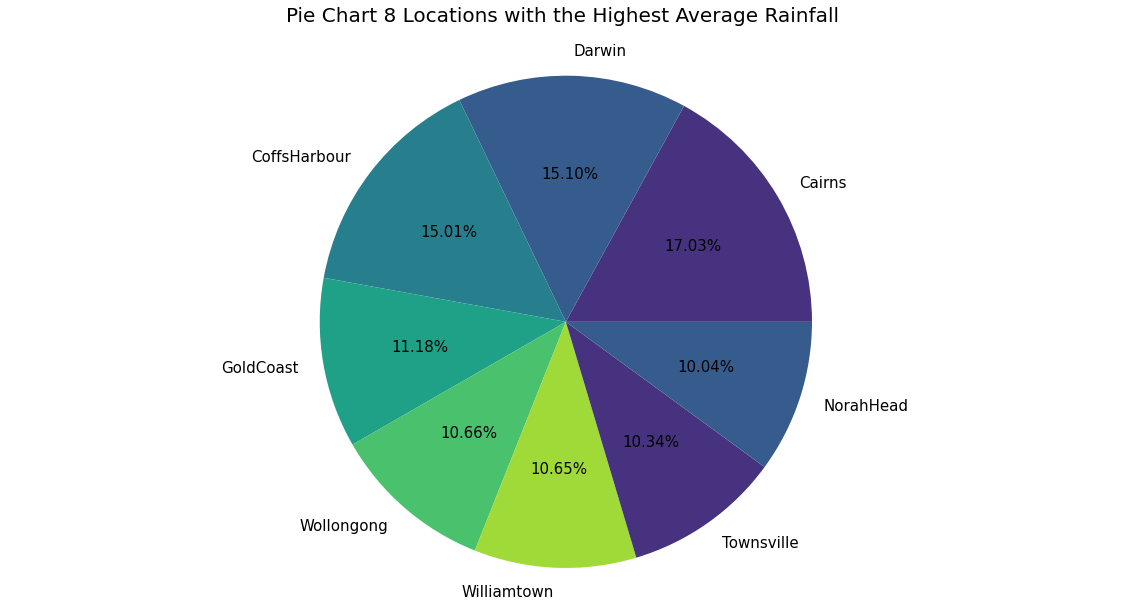

In [42]:
df_mean_top8 = df_mean.head(8)

color = sns.color_palette("viridis")

ax = df_mean_top8.groupby(['Location']).sum()['Rainfall'].sort_values(ascending=False)
ax.plot(kind = "pie", 
        figsize = (20,10),  
        autopct = "%1.2f%%", 
        fontsize = 15, 
        colors = color)
plt.title('Pie Chart 8 Locations with the Highest Average Rainfall \n', fontsize=20)
plt.ylabel('')
plt.axis('equal')

plt.show()

**Conclusion :**

Based on the graph above it can be seen that the 3 locations with the highest average rainfall are
- Cairns with a percentage of 17.03%
- Darwin with a percentage of 15.10%
- Port of Coffs with a percentage of 15.01%

### RainTomorrow Based on WindGustDir

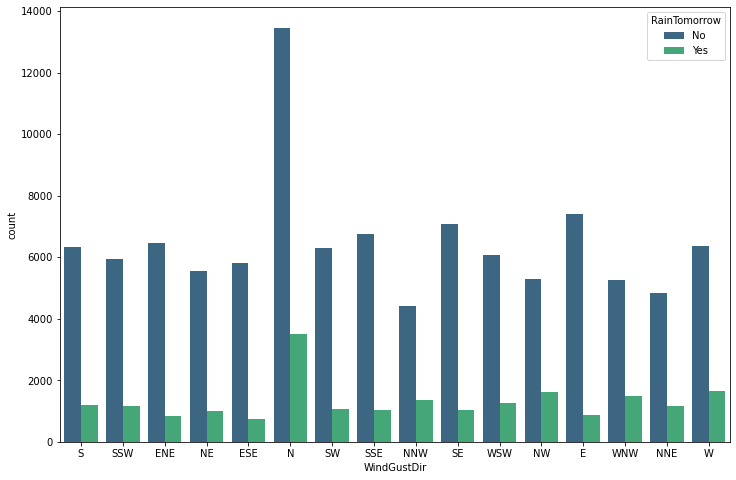

In [43]:
plt.figure(figsize = (12,8))
sns.countplot(data = df_new, x='WindGustDir', hue='RainTomorrow', palette='viridis');

### RainTomorrow Based on Each Season

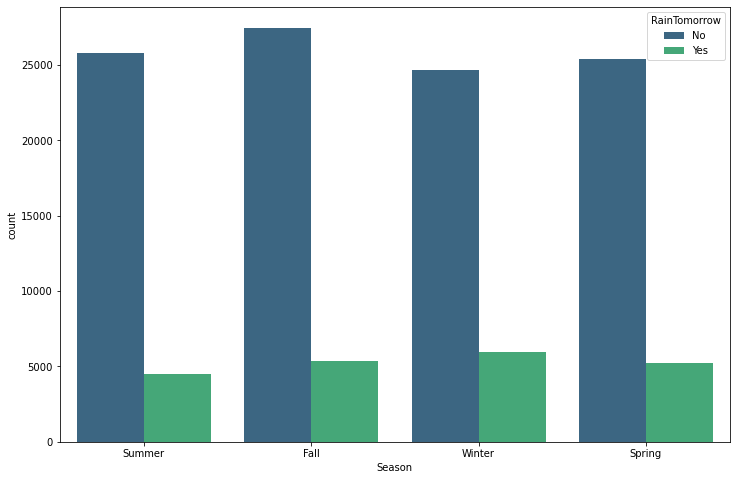

In [44]:
plt.figure(figsize = (12,8))
sns.countplot(data = df_new, x='Season', hue='RainTomorrow', palette='viridis');

In [45]:
x = pd.crosstab(df_new['RainTomorrow'],df_new['Season'])
x

Season,Fall,Spring,Summer,Winter
RainTomorrow,,,,
No,27475,25362,25788,24685
Yes,5383,5196,4466,5982


In [46]:
y = x/(x.sum().values)*100
y

Season,Fall,Spring,Summer,Winter
RainTomorrow,,,,
No,83.617384,82.996269,85.238316,80.49369
Yes,16.382616,17.003731,14.761684,19.50631


**Conclusion :**

It can be seen in the chart above, that in each season the number of tomorrow does not rain much more than tomorrow there is rain. But in winter, the occurrence of RainTomorrow is higher than others by 25.55%

### Corellation RainTomorrow with WindSpeed9am and WindSpeed3pm

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

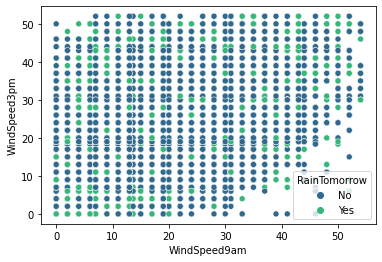

In [47]:
sns.scatterplot(x='WindSpeed9am', y='WindSpeed3pm', data=df_new, hue='RainTomorrow', palette = 'viridis')

### Visualization All Atribute

In [48]:
numer_col=['Location', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'RainToday',
       'RainTomorrow', 'Month', 'Year', 'Season', 'Average Temp',
       'Average Humidity']

df_numer = df_new[numer_col]

df_numer.head(5)

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow,Month,Year,Season,Average Temp,Average Humidity
58202,Bendigo,0.0,S,39.0,ENE,SW,11.0,11.0,No,No,1,2009,Summer,36.60,18.5
13828,Moree,0.4,SSW,44.0,S,SSW,33.0,33.0,No,No,1,2014,Summer,27.30,37.5
13829,Moree,0.0,ENE,56.0,E,S,28.0,19.0,No,No,1,2014,Summer,27.55,37.5
13830,Moree,0.0,ENE,54.0,E,SSE,19.0,17.0,No,No,1,2014,Summer,26.80,35.5
13831,Moree,0.0,NE,43.0,ENE,E,19.0,15.0,No,No,1,2014,Summer,27.40,35.0


In [49]:
num_data = df_new[numer_col]
num_data.describe()

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Month,Year,Average Temp,Average Humidity
count,124337.000000,124337.000000,124337.000000,124337.000000,124337.000000,124337.000000,124337.000000,124337.000000
mean,0.254345,39.044040,13.633039,18.336291,6.396736,2012.784746,19.649488,57.714455
std,0.616669,12.370409,8.561926,8.421069,3.440673,2.535323,6.395889,17.370430
min,0.000000,6.000000,0.000000,0.000000,1.000000,2007.000000,-4.450000,0.000000
25%,0.000000,31.000000,7.000000,13.000000,3.000000,2011.000000,14.984146,47.000000
50%,0.000000,39.000000,13.000000,18.372150,6.000000,2013.000000,19.450000,58.500000
75%,0.200000,46.000000,19.000000,24.000000,9.000000,2015.000000,24.100000,69.500000
max,3.200000,94.000000,54.000000,52.000000,12.000000,2017.000000,41.600000,100.000000


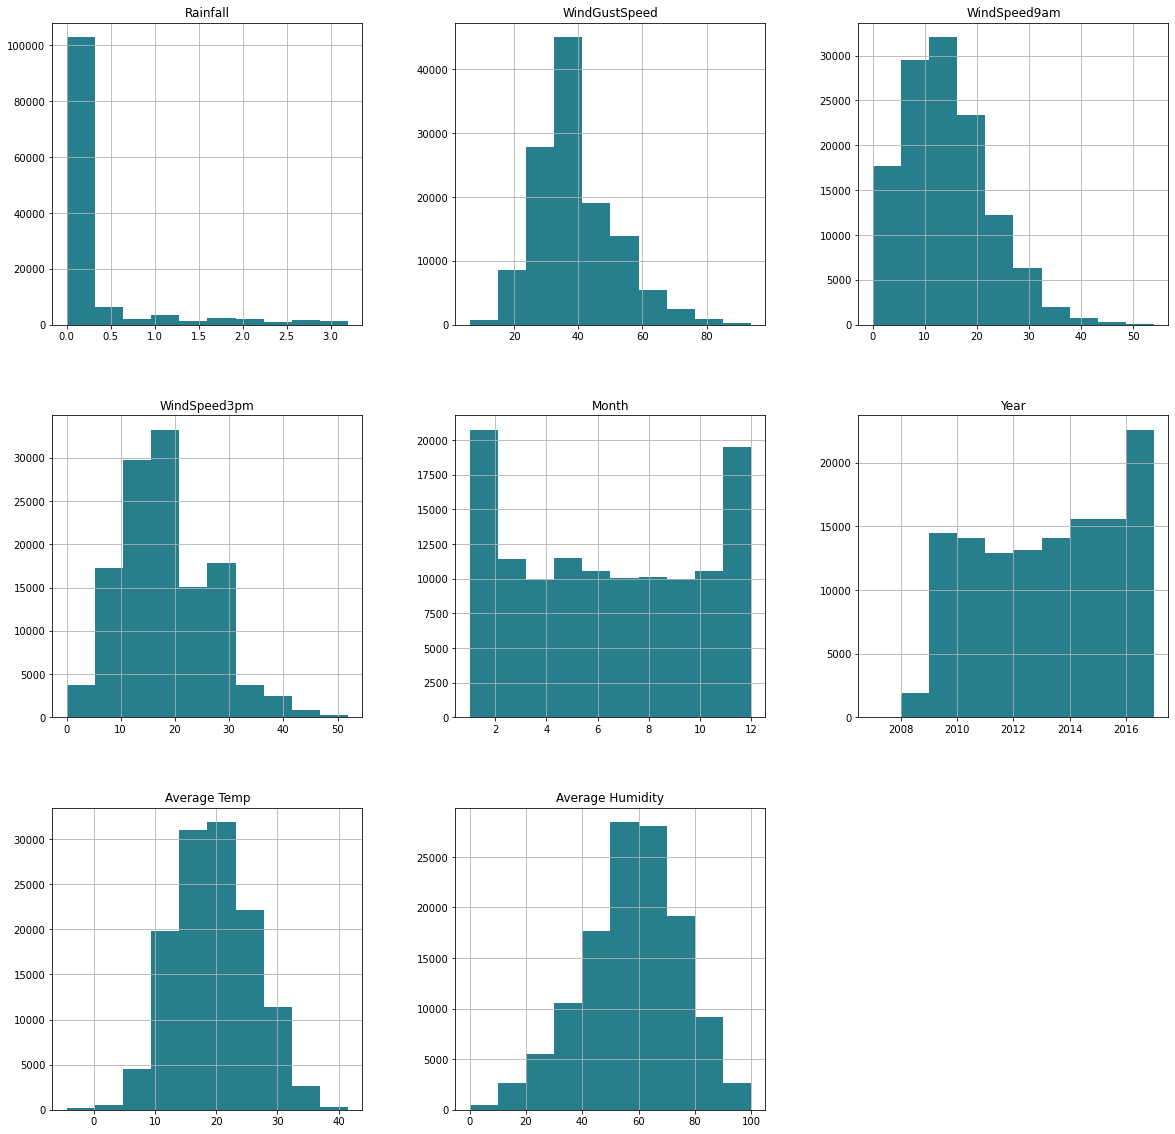

In [50]:
num_data[numer_col].hist(bins=10, figsize = (20,20), color='#277f8e')

plt.show()

**Conclusion :**

From the plot above, we can deduce that ranfall, windgustspeed, windspeed9am and windspeed3pm are right skewed distribution, so it can contain outliers

# Data Preprocessing

In [51]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124337 entries, 58202 to 0
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          124337 non-null  object 
 1   Rainfall          124337 non-null  float64
 2   WindGustDir       124337 non-null  object 
 3   WindGustSpeed     124337 non-null  float64
 4   WindDir9am        124337 non-null  object 
 5   WindDir3pm        124337 non-null  object 
 6   WindSpeed9am      124337 non-null  float64
 7   WindSpeed3pm      124337 non-null  float64
 8   RainToday         124337 non-null  object 
 9   RainTomorrow      124337 non-null  object 
 10  Month             124337 non-null  int64  
 11  Year              124337 non-null  int64  
 12  Season            124337 non-null  object 
 13  Average Temp      124337 non-null  float64
 14  Average Humidity  124337 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 19.2+ MB


## Encoding of categorical Features

In [52]:
def encode(feature):
    encoding = {}
    unique = list(df_new[feature].unique())
    for value in range(len(unique)):
        encoding[unique[value]] = value
    print(encoding)
    return encoding

In [53]:
df_new['RainToday'].replace(encode('RainToday'),inplace = True)

{'No': 0, 'Yes': 1}


C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\3143121588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['RainToday'].replace(encode('RainToday'),inplace = True)


In [54]:
df_new['RainTomorrow'].replace(encode('RainTomorrow'),inplace = True)

{'No': 0, 'Yes': 1}


C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\821840129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['RainTomorrow'].replace(encode('RainTomorrow'),inplace = True)


In [55]:
df_new['WindDir9am'].replace(encode('WindDir9am'),inplace = True)

{'ENE': 0, 'S': 1, 'E': 2, 'ESE': 3, 'WSW': 4, 'NE': 5, 'N': 6, 'SE': 7, 'SSE': 8, 'W': 9, 'SSW': 10, 'NNE': 11, 'SW': 12, 'NNW': 13, 'WNW': 14, 'NW': 15}


C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\3736382421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['WindDir9am'].replace(encode('WindDir9am'),inplace = True)


In [56]:
df_new['WindDir3pm'].replace(encode('WindDir3pm'),inplace = True)

{'SW': 0, 'SSW': 1, 'S': 2, 'SSE': 3, 'E': 4, 'NNE': 5, 'ENE': 6, 'WSW': 7, 'NE': 8, 'N': 9, 'SE': 10, 'NNW': 11, 'W': 12, 'WNW': 13, 'NW': 14, 'ESE': 15}


C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\2901431515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['WindDir3pm'].replace(encode('WindDir3pm'),inplace = True)


In [57]:
df_new['WindGustDir'].replace(encode('WindGustDir'),inplace = True)

{'S': 0, 'SSW': 1, 'ENE': 2, 'NE': 3, 'ESE': 4, 'N': 5, 'SW': 6, 'SSE': 7, 'NNW': 8, 'SE': 9, 'WSW': 10, 'NW': 11, 'E': 12, 'WNW': 13, 'NNE': 14, 'W': 15}


C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\3750176483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['WindGustDir'].replace(encode('WindGustDir'),inplace = True)


In [58]:
df_new['Location'].replace(encode('Location'), inplace = True)

{'Bendigo': 0, 'Moree': 1, 'Wollongong': 2, 'Ballarat': 3, 'PearceRAAF': 4, 'Mildura': 5, 'MountGinini': 6, 'AliceSprings': 7, 'Albany': 8, 'Townsville': 9, 'Melbourne': 10, 'Canberra': 11, 'Sale': 12, 'SydneyAirport': 13, 'Brisbane': 14, 'SalmonGums': 15, 'MountGambier': 16, 'Witchcliffe': 17, 'Nuriootpa': 18, 'Watsonia': 19, 'Woomera': 20, 'Williamtown': 21, 'Walpole': 22, 'Newcastle': 23, 'Hobart': 24, 'Sydney': 25, 'PerthAirport': 26, 'Launceston': 27, 'Richmond': 28, 'Perth': 29, 'Penrith': 30, 'Dartmoor': 31, 'Darwin': 32, 'CoffsHarbour': 33, 'Cairns': 34, 'Portland': 35, 'Cobar': 36, 'Tuggeranong': 37, 'MelbourneAirport': 38, 'NorfolkIsland': 39, 'Nhil': 40, 'Adelaide': 41, 'NorahHead': 42, 'WaggaWagga': 43, 'Uluru': 44, 'GoldCoast': 45, 'Albury': 46, 'BadgerysCreek': 47, 'Katherine': 48}


C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\1650036500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Location'].replace(encode('Location'), inplace = True)


In [59]:
df_new['Season'].replace(encode('Season'), inplace = True)

{'Summer': 0, 'Fall': 1, 'Winter': 2, 'Spring': 3}


C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_13732\2258165016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Season'].replace(encode('Season'), inplace = True)


In [60]:
df_new

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow,Month,Year,Season,Average Temp,Average Humidity
58202,0,0.000000,0,39.0,0,0,11.0,11.0,0,0,1,2009,0,36.60,18.5
13828,1,0.400000,1,44.0,1,1,33.0,33.0,0,0,1,2014,0,27.30,37.5
13829,1,0.000000,2,56.0,2,2,28.0,19.0,0,0,1,2014,0,27.55,37.5
13830,1,0.000000,2,54.0,2,3,19.0,17.0,0,0,1,2014,0,26.80,35.5
13831,1,0.000000,3,43.0,0,4,19.0,15.0,0,0,1,2014,0,27.40,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41611,21,0.000000,0,67.0,6,6,13.0,28.0,0,1,12,2014,0,30.75,45.5
41613,21,0.254396,13,52.0,5,4,11.0,24.0,0,0,12,2014,0,26.10,65.0
41614,21,0.254396,2,31.0,3,10,4.0,24.0,0,1,12,2014,0,24.30,70.5
41610,21,3.200000,3,44.0,13,4,13.0,20.0,1,0,12,2014,0,27.15,62.5


## Correlation

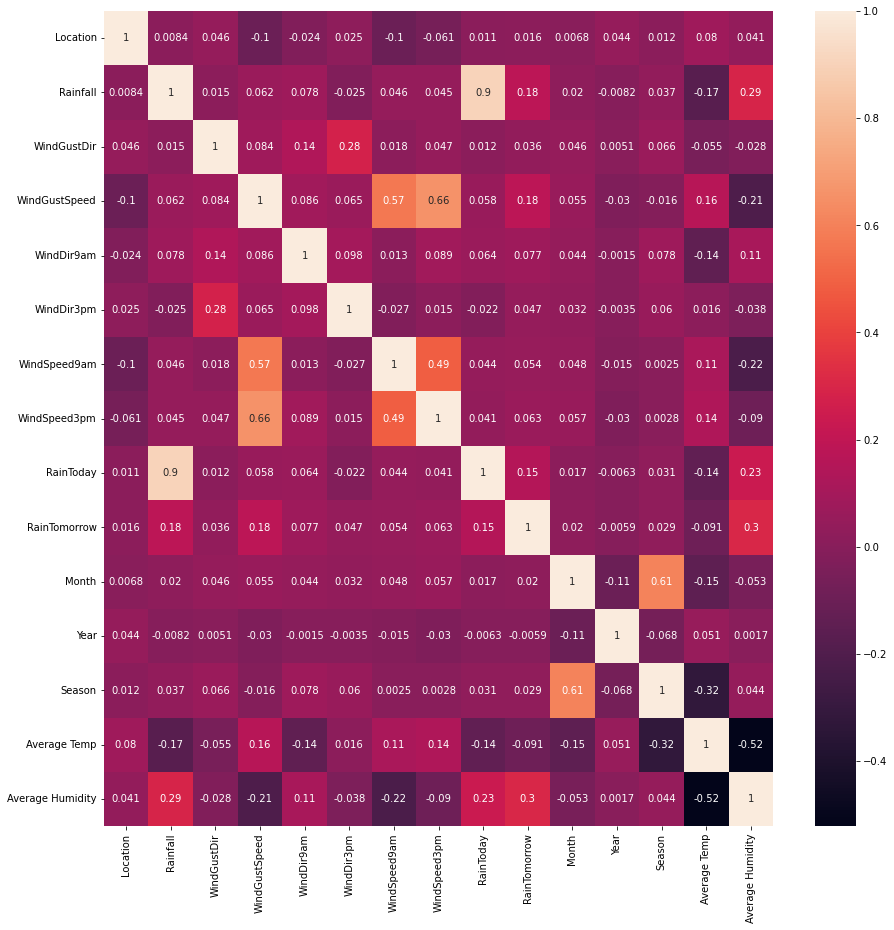

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

## Splitting Data

In [62]:
x = df_new.drop(["RainTomorrow", 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Month', 'Year'],axis = 1)  
y = df_new["RainTomorrow"] 

In [63]:
from sklearn.model_selection import train_test_split   # testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0 )

## Feature Scaling

In [64]:
#Standarisasi data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Model Definition
---  ------                       --------------   ----- 
After doing data cleaning and data preprocessing, the data obtained will be used for the next model training. There are 8 variables **(RainTommorow, Location, Rainfall, WindGustSpeed, RainToday, Season, Average Temp, Average Humidityr)** that will be used to create a rain next-day estimate model .

The test **method that will be used in this project is the Logistic Regression and Support Vector Machine method**. 

### Logistic Regression
---  ------                       --------------   ----- 
Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

Logistic regression is a linear classifier, so we will use linear functions $𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ$. The variables $𝑏₀, 𝑏₁,…, 𝑏ᵣ$ are estimators of regression coefficients, which are also called predicted weights or coefficients.

The logistic regression function $𝑝 (𝐱)$ is the sigmoid function of $𝑓(𝐱): 𝑝 (𝐱) = \frac{1}{(1 + exp (−𝑓(𝐱))}$. Therefore, it is often close to 0 or 1. The function $𝑝(𝐱 )$ is often interpreted as a predicted probability where the output for a given $𝐱$ is equal to 1. Therefore, $1 - 𝑝(𝑥)$ is the probability that the output is 0.

Logistic regression determines the weight of the best prediction $𝑏₀, 𝑏₁,…, 𝑏ᵣ$ such that the function $𝑝(𝐱)$ is as close as possible to all actual responses $𝑦ᵢ, 𝑖 = 1,…, 𝑛$, where $𝑛$ is the number of observations, it is called fitting model.

To get the best weight, usually maximize the log-likelihood function (LLF) for all observations $𝑖 = 1,…, 𝑛$. This method is called maximum likelihood estimation and is represented by the equation $$LLF = Σᵢ(𝑦ᵢ log (𝑝(𝐱ᵢ)) + (1 - 𝑦ᵢ) log (1 - 𝑝(𝐱ᵢ)))$$.

If $𝑦ᵢ = 0$, the LLF of related observations is equal to $log (1 - 𝑝(𝐱ᵢ))$. If $𝑝(𝐱ᵢ)$ approaches $𝑦ᵢ = 0$, then $log (1 - 𝑝(𝐱ᵢ))$ approaches 0. If $𝑝(𝐱ᵢ)$ is far from 0, then $log (1 - 𝑝(𝐱ᵢ))$ drops significantly. Likewise, if $𝑦ᵢ = 1$, the LLF for that observation is $𝑦ᵢ log(𝑝(𝐱ᵢ))$. If $𝑝(𝐱ᵢ)$ approaches $𝑦ᵢ = 1$, then $log (𝑝(𝐱ᵢ))$ approaches 0. If $𝑝 (𝐱ᵢ)$ is far from 1, then $log (𝑝 (𝐱ᵢ))$ is a large negative number.

### Support Vector Machine
---  ------                       --------------   ----- 
Support Vector Machines are considered a classification approach, but can be used in both classification and regression problem types. SVM can easily handle multiple continuous and categorical variables. SVM builds hyperplanes in multidimensional space to separate different classes. SVM generates an optimal hyperplane repeatedly, which is used to minimize errors. The core idea of SVM is to find the maximum marginal hyperplane (MMH) that best divides the dataset into several classes.

Its main goal is to segregate a given data set in the best possible way. The distance between any of the closest points is known as the margin. The goal is to select a hyperplane with the maximum possible margin between support vectors in a given dataset. SVM looks for the maximum marginal hyperplane in the following steps:
1. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.
2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side of the figure.

# Create Model, Train and Evaluation 

### Logistic Reggression 

In [65]:
lg = LogisticRegression(solver='liblinear', random_state=0)
model_lg = lg.fit(x_train, y_train)
y_pred1 = lg.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred1)))

Accuracy Score: 0.8476757278430112


In [66]:
print("Train Score: {}".format(lg.score(x_train, y_train)))
print("Test Score: {}".format(lg.score(x_test, y_test)))

Train Score: 0.846820244729132
Test Score: 0.8476757278430112


Confusion Matrix
------------------------------------------------------


C:\Users\W I N D O W S\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


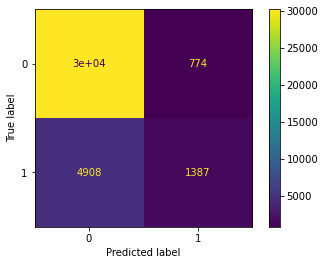

Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     31007
           1       0.64      0.22      0.33      6295

    accuracy                           0.85     37302
   macro avg       0.75      0.60      0.62     37302
weighted avg       0.82      0.85      0.82     37302

ROC Curve
------------------------------------------------------


C:\Users\W I N D O W S\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


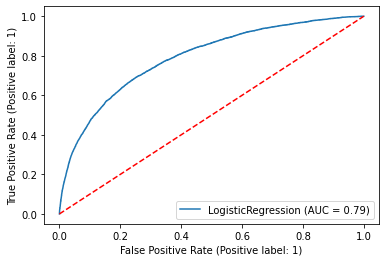

In [67]:
def confusion_matrix(lg, x_test, y_test):
    plot_confusion_matrix(lg, x_test, y_test)
    plt.show()

def roc_curve(lg, x_test, y_test):
    plot_roc_curve(lg, x_test, y_test)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.show()
    
def evaluate(lg, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, y_pred=y_pred1):
    print('Confusion Matrix')
    print('------------------------------------------------------')
    confusion_matrix(lg, x_test, y_test)
    
    print('Classification Report') 
    print('------------------------------------------------------')
    print(classification_report(y_test, y_pred1))

    print('ROC Curve')
    print('------------------------------------------------------')
    roc_curve(lg, x_test, y_test)
    
evaluate(lg)
    

### Support Vector Machine (SVM)

In [68]:
svm = SVC(kernel='linear')
model_svm = svm.fit(x_train, y_train)
y_pred2 = svm.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred2)))

Accuracy Score: 0.8312422926384644


In [69]:
print("Train Score: {}".format(svm.score(x_train, y_train)))
print("Test Score: {}".format(svm.score(x_test, y_test)))

Train Score: 0.8307347618774057
Test Score: 0.8312422926384644


Confusion Matrix
------------------------------------------------------


C:\Users\W I N D O W S\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


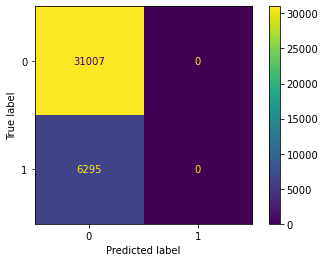

Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     31007
           1       0.00      0.00      0.00      6295

    accuracy                           0.83     37302
   macro avg       0.42      0.50      0.45     37302
weighted avg       0.69      0.83      0.75     37302

ROC Curve
------------------------------------------------------


C:\Users\W I N D O W S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\W I N D O W S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\W I N D O W S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\W I N D O W S\anaconda

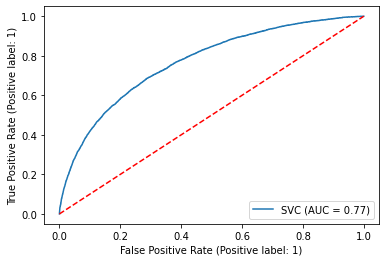

In [70]:
def confusion_matrix(svm, x_test, y_test):
    plot_confusion_matrix(svm, x_test, y_test)
    plt.show()

def roc_curve(svm, x_test, y_test):
    plot_roc_curve(svm, x_test, y_test)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.show()
    
def evaluate(svm, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, y_pred=y_pred2):
    print('Confusion Matrix')
    print('------------------------------------------------------')
    confusion_matrix(svm, x_test, y_test)
    
    print('Classification Report') 
    print('------------------------------------------------------')
    print(classification_report(y_test, y_pred2))

    print('ROC Curve')
    print('------------------------------------------------------')
    roc_curve(svm, x_test, y_test)
    
evaluate(svm)
    

In [71]:
MAE_lg = mean_absolute_error(y_test, y_pred1)
MAE_svm = mean_absolute_error(y_test, y_pred2)
MSE_lg = mean_squared_error(y_test, y_pred1)
MSE_svm = mean_squared_error(y_test, y_pred2)

Accuracy_lg = accuracy_score(y_test,y_pred1)
Accuracy_svm = accuracy_score(y_test,y_pred2)

model = pd.Series(['Logistic Regression', 'SVM'])
Accuracy_score = pd.Series([Accuracy_lg, Accuracy_svm])
MAE_score = pd.Series([MAE_lg, MAE_svm])
MSE_score = pd.Series([MSE_lg, MSE_svm])

Classifier = pd.DataFrame({'Classifier': model, 'Accuracy_score': Accuracy_score, 'MAE_score': MAE_score, 'MSE_score': MSE_score})
Classifier

,Classifier,Accuracy_score,MAE_score,MSE_score
0,Logistic Regression,0.847676,0.152324,0.152324
1,SVM,0.831242,0.168758,0.168758


**Logistic Regression Model** performed best based on Precision Score, ROC_AUC, F1-Score, Accuracy Score, and minimum of MAE Score and MSE Score.

# Model Inference

In [72]:
x

,Location,Rainfall,WindGustSpeed,RainToday,Season,Average Temp,Average Humidity
58202,0,0.000000,39.0,0,0,36.60,18.5
13828,1,0.400000,44.0,0,0,27.30,37.5
13829,1,0.000000,56.0,0,0,27.55,37.5
13830,1,0.000000,54.0,0,0,26.80,35.5
13831,1,0.000000,43.0,0,0,27.40,35.0
...,...,...,...,...,...,...,...
41611,21,0.000000,67.0,0,0,30.75,45.5
41613,21,0.254396,52.0,0,0,26.10,65.0
41614,21,0.254396,31.0,0,0,24.30,70.5
41610,21,3.200000,44.0,1,0,27.15,62.5


In [73]:
x.columns

Index(['Location', 'Rainfall', 'WindGustSpeed', 'RainToday', 'Season',
       'Average Temp', 'Average Humidity'],
      dtype='object')

In [74]:
#Input Value

v1 = [10, 8, 30, 0, 3, 19.35, 46.5 ]
value = [v1]

data = pd.DataFrame(value,  columns= ['Location', 'Rainfall', 'WindGustSpeed', 'RainToday', 'Season', 'Average Temp', 'Average Humidity'])

data

,Location,Rainfall,WindGustSpeed,RainToday,Season,Average Temp,Average Humidity
0,10,8,30,0,3,19.35,46.5


In [75]:
predict = lg.predict(data)
if predict == 1:
    print("Chances are there will be rain")
else :
    print("Chances are it won't rain")

Chances are there will be rain


C:\Users\W I N D O W S\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Overall

In [76]:
pickle.dump(model_lg, open('model_lg.pkl','wb'))
pickle.dump(model_svm, open('model_svm.pkl','wb'))

This is the **overall conclusion** of modelling Rain Next-Day Prediction :

1. From 23 existing attributes, 8 of the most influential attributes in Rain Next-Day Prediction are taken, including RainTomorrow, Location, Rainfall, WindGustSpeed, RainToday, Season, Average Temp, and Average Humidity.
2. The test method uses 2 models, namely Logistic Regression with accuracy score 84.76%, MAE 15.23%, MSE 15.23%. The second method is SVM (Support Vector Machine) with accuracy score 83.12%, MAE 16.88%, and MSE 16.88%.
3. From the dataset used, it can be seen that the occurrence of no rain on RainTomorrow is more than the occurrence of rain. Where the percentage of no rain tomorrow if it rains today is 64.89% and if it does not rain today is 84.87%.